In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
import sys
import seaborn as sns
import warnings
import math
warnings.filterwarnings("ignore")
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
pd.set_option('display.max_rows', 100,'display.max_columns', 1000,"display.max_colwidth",1000,'display.width',1000)

from sklearn.metrics import *
from sklearn.linear_model import *
from sklearn.neighbors import *
from sklearn.svm import *
from sklearn.neural_network import *
from sklearn.tree import *
from sklearn.ensemble import *
from xgboost import *
import lightgbm as lgb
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.preprocessing import *
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.model_selection import *

In [6]:
data = pd.read_excel("二手房数据（处理后）.xlsx", na_values=np.nan)

In [7]:
data.shape

(2984, 85)

In [9]:
data.head()

,总价,单位价格,楼房信息,建筑面积,套内面积,产权所属,房屋户型_室,房屋户型_厅,房屋户型_厨,房屋户型_卫,梯户比例_梯,梯户比例_户,梯户比例_比例,小区建造年份,楼栋总数,小区均价,抵押信息_01,挂牌时间差（天）,上次交易差（天）,房龄,所属区县_于洪,所属区县_和平,所属区县_大东,所属区县_沈北新区,所属区县_沈河,所属区县_浑南,所属区县_皇姑,所属区县_苏家屯,所属区县_铁西,所在楼层_中楼层,所在楼层_低楼层,所在楼层_高楼层,户型结构_复式,户型结构_平层,户型结构_暂无数据,户型结构_跃层,户型结构_错层,建筑类型_塔楼,建筑类型_平房,建筑类型_暂无数据,建筑类型_板塔结合,建筑类型_板楼,房屋朝向_东,房屋朝向_东 北,房屋朝向_东 南 北,房屋朝向_东 西,房屋朝向_东北,房屋朝向_东南,房屋朝向_其他朝向,房屋朝向_北,房屋朝向_北 南,房屋朝向_南,房屋朝向_南 北,房屋朝向_南 北 东,房屋朝向_南 北 西,房屋朝向_南 西 北,房屋朝向_西,房屋朝向_西北,房屋朝向_西南,建筑结构_未知结构,建筑结构_框架结构,建筑结构_混合结构,建筑结构_砖混结构,建筑结构_钢混结构,装修情况_其他,装修情况_毛坯,装修情况_简装,装修情况_精装,供暖方式_暂无数据,供暖方式_自供暖,供暖方式_集中供暖,配备电梯_无,配备电梯_暂无数据,配备电梯_有,交易权属_商品房,交易权属_已购公房,交易权属_经济适用房,交易权属_限价商品房,房屋用途_别墅,房屋用途_商住两用,房屋用途_普通住宅,房屋年限_暂无数据,房屋年限_未满两年,房屋年限_满两年,房屋年限_满五年
0,179.0,14512,2014,123.35,108.03,1,3,2,1,2,2,2,1.0,2013,27,17465,1,7,1056.0,8,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0
1,105.0,9740,2011,107.81,92.49,0,3,2,1,1,2,4,2.0,1999,5,9590,0,2,2384.0,11,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1
2,67.8,8693,2000,78.00,62.68,0,2,1,1,1,1,2,2.0,1990,13,14413,0,5,1361.0,22,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,1,0
3,179.0,13426,2010,133.33,118.01,0,3,2,1,2,2,3,1.5,2009,27,11637,0,134,2076.0,12,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1
4,90.0,7987,2009,112.69,97.37,1,3,2,1,2,1,2,2.0,2009,38,9263,0,9,2179.0,13,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1


In [10]:
data.describe()

,总价,单位价格,楼房信息,建筑面积,套内面积,产权所属,房屋户型_室,房屋户型_厅,房屋户型_厨,房屋户型_卫,梯户比例_梯,梯户比例_户,梯户比例_比例,小区建造年份,楼栋总数,小区均价,抵押信息_01,挂牌时间差（天）,上次交易差（天）,房龄,所属区县_于洪,所属区县_和平,所属区县_大东,所属区县_沈北新区,所属区县_沈河,所属区县_浑南,所属区县_皇姑,所属区县_苏家屯,所属区县_铁西,所在楼层_中楼层,所在楼层_低楼层,所在楼层_高楼层,户型结构_复式,户型结构_平层,户型结构_暂无数据,户型结构_跃层,户型结构_错层,建筑类型_塔楼,建筑类型_平房,建筑类型_暂无数据,建筑类型_板塔结合,建筑类型_板楼,房屋朝向_东,房屋朝向_东 北,房屋朝向_东 南 北,房屋朝向_东 西,房屋朝向_东北,房屋朝向_东南,房屋朝向_其他朝向,房屋朝向_北,房屋朝向_北 南,房屋朝向_南,房屋朝向_南 北,房屋朝向_南 北 东,房屋朝向_南 北 西,房屋朝向_南 西 北,房屋朝向_西,房屋朝向_西北,房屋朝向_西南,建筑结构_未知结构,建筑结构_框架结构,建筑结构_混合结构,建筑结构_砖混结构,建筑结构_钢混结构,装修情况_其他,装修情况_毛坯,装修情况_简装,装修情况_精装,供暖方式_暂无数据,供暖方式_自供暖,供暖方式_集中供暖,配备电梯_无,配备电梯_暂无数据,配备电梯_有,交易权属_商品房,交易权属_已购公房,交易权属_经济适用房,交易权属_限价商品房,房屋用途_别墅,房屋用途_商住两用,房屋用途_普通住宅,房屋年限_暂无数据,房屋年限_未满两年,房屋年限_满两年,房屋年限_满五年
count,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.00000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000
mean,107.613740,10873.636729,2010.718834,95.010137,79.690127,0.308311,2.371984,1.486260,1.003351,1.292560,1.489276,3.326072,2.393236,2005.821381,34.103552,11557.738941,0.470845,226.781836,1855.469715,11.281166,0.170241,0.112601,0.056300,0.110590,0.043566,0.259718,0.083110,0.023458,0.140416,0.402815,0.278485,0.31870,0.017761,0.918901,0.008043,0.037534,0.017761,0.035858,0.001340,0.026810,0.110590,0.825402,0.010389,0.005362,0.014745,0.007038,0.007708,0.026810,0.026139,0.007708,0.015416,0.133713,0.672587,0.004692,0.005697,0.009718,0.014075,0.014745,0.023458,0.020442,0.017091,0.071046,0.061327,0.830094,0.058311,0.161193,0.153485,0.627011,0.015751,0.002346,0.981903,0.137399,0.119303,0.743298,0.996649,0.000670,0.002011,0.000670,0.005697,0.005362,0.988941,0.142426,0.175268,0.351877,0.330429
std,73.121368,4237.372958,8.186665,34.361128,34.153069,0.461873,0.754714,0.529846,0.081813,0.514488,1.214183,2.558057,1.261578,9.589003,27.893523,4159.188883,0.499233,187.191343,1415.882520,8.186665,0.375908,0.316157,0.230539,0.313676,0.204161,0.438554,0.276095,0.151380,0.347476,0.490546,0.448329,0.46605,0.132105,0.273033,0.089336,0.190097,0.132105,0.185967,0.036594,0.161554,0.313676,0.379686,0.101411,0.073041,0.120552,0.083608,0.087470,0.161554,0.159577,0.087470,0.123219,0.340401,0.469348,0.068346,0.075276,0.098119,0.117820,0.120552,0.151380,0.141532,0.129633,0.256944,0.239970,0.375613,0.234370,0.367771,0.360515,0.483680,0.124530,0.048385,0.133323,0.344326,0.324199,0.436887,0.057802,0.025885,0.044803,0.025885,0.075276,0.073041,0.104596,0.349545,0.380260,0.477636,0.470446
min,12.800000,2686.000000,1900.000000,20.080000,4.760000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1900.000000,1.000000,4797.000000,0.000000,1.000000,1.000000,-99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

In [11]:
X = data[ data.columns[1:] ]
y_reg = data[ data.columns[0] ]

x_train, x_test, y_train, y_test = train_test_split(X, y_reg, test_size=0.3, random_state=42)

In [12]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2088, 84), (896, 84), (2088,), (896,))

In [19]:
def evaluation(model):
    ypred = model.predict(x_test)
    mae = mean_absolute_error(y_test, ypred)
    mse = mean_squared_error(y_test, ypred)
    rmse = math.sqrt(mse)
    print("MAE: %.2f" % mae)
    print("MSE: %.2f" % mse)
    print("RMSE: %.2f" % rmse)
    return ypred

In [45]:
model_LR = LinearRegression()
model_LR.fit(x_train, y_train)
print("params: ", model_LR.get_params())
print("train score: ", model_LR.score(x_train, y_train))
print("test score: ", model_LR.score(x_test, y_test))
predict_y = evaluation(model_LR)

params:  {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}
train score:  0.9393799595620992
test score:  0.9369392050137573
MAE: 12.11
MSE: 370.69
RMSE: 19.25


In [46]:
test_y = np.array(y_test)

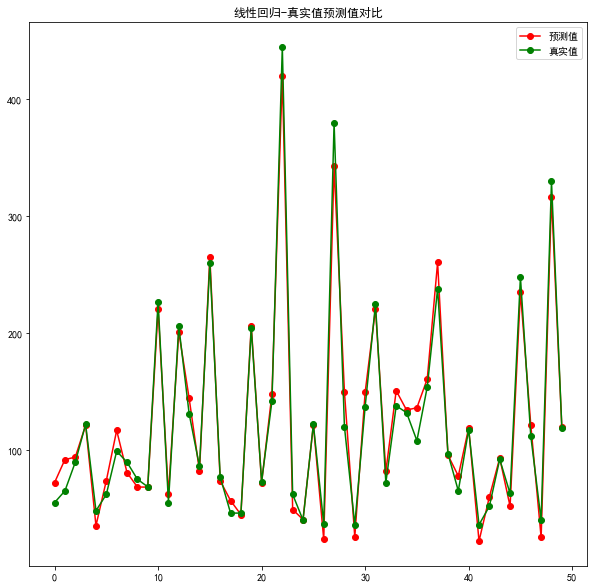

In [47]:
plt.figure(figsize=(10,10))
plt.title('线性回归-真实值预测值对比')
plt.plot(predict_y[:50], 'ro-', label='预测值')
plt.plot(test_y[:50], 'go-', label='真实值')
plt.legend()
plt.show()

In [48]:
model_knn = KNeighborsRegressor()
model_knn.fit(x_train, y_train)
print("params: ", model_knn.get_params())
print("train score: ", model_knn.score(x_train, y_train))
print("test score: ", model_knn.score(x_test, y_test))
predict_y = evaluation(model_knn)

params:  {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
train score:  0.8055745690649098
test score:  0.7144393809856229
MAE: 27.67
MSE: 1678.59
RMSE: 40.97


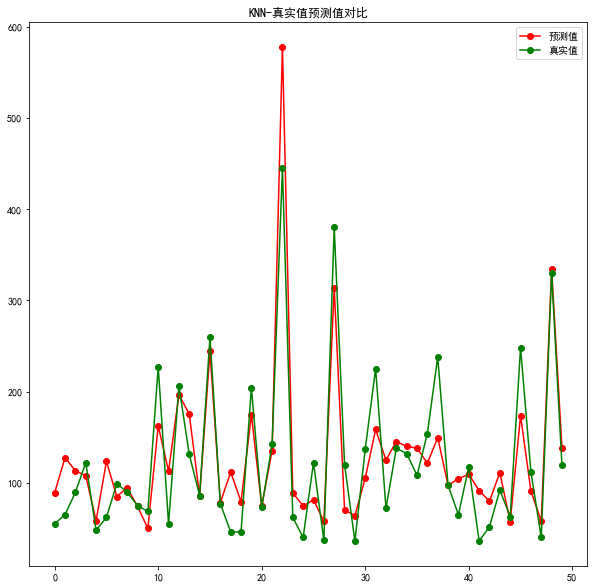

In [49]:
plt.figure(figsize=(10,10))
plt.title('KNN-真实值预测值对比')
plt.plot(predict_y[:50], 'ro-', label='预测值')
plt.plot(test_y[:50], 'go-', label='真实值')
plt.legend()
plt.show()

In [54]:
model_dtr = DecisionTreeRegressor(max_depth = 5, random_state=30)
model_dtr.fit(x_train, y_train)
print("params: ", model_dtr.get_params())
print("train score: ", model_dtr.score(x_train, y_train))
print("test score: ", model_dtr.score(x_test, y_test))
predict_y = evaluation(model_dtr)

params:  {'criterion': 'mse', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': 30, 'splitter': 'best'}
train score:  0.9624891829996234
test score:  0.9457849042838976
MAE: 12.19
MSE: 318.69
RMSE: 17.85


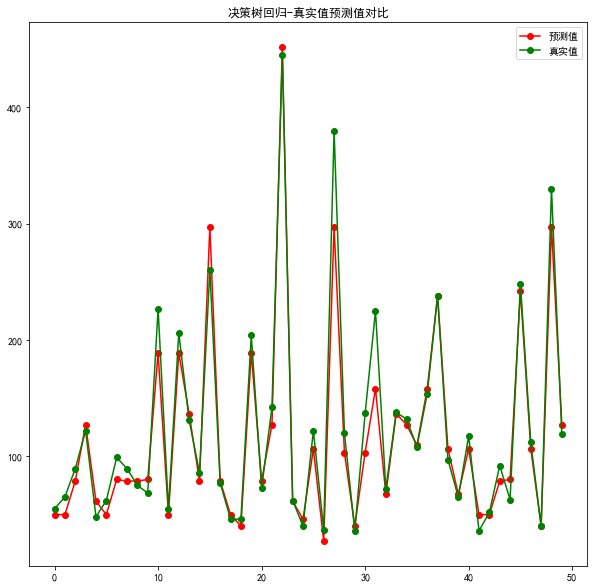

In [55]:
plt.figure(figsize=(10,10))
plt.title('决策树回归-真实值预测值对比')
plt.plot(predict_y[:50], 'ro-', label='预测值')
plt.plot(test_y[:50], 'go-', label='真实值')
plt.legend()
plt.show()

In [52]:
model_dtr = DecisionTreeRegressor( random_state=30)
model_dtr.fit(x_train, y_train)
print("params: ", model_dtr.get_params())
print("train score: ", model_dtr.score(x_train, y_train))
print("test score: ", model_dtr.score(x_test, y_test))
predict_y = evaluation(model_dtr)

params:  {'criterion': 'mse', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': 30, 'splitter': 'best'}
train score:  1.0
test score:  0.9819886071850025
MAE: 4.36
MSE: 105.88
RMSE: 10.29


In [53]:
model_dtr.get_depth()

17

In [26]:
model_etr = ExtraTreeRegressor(random_state=30)
model_etr.fit(x_train, y_train)
print("params: ", model_etr.get_params())
print("train score: ", model_etr.score(x_train, y_train))
print("test score: ", model_etr.score(x_test, y_test))
predict_y = evaluation(model_etr)

params:  {'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 30, 'splitter': 'random'}
train score:  1.0
test score:  0.9350805095862019
MAE: 6.20
MSE: 381.61
RMSE: 19.53


In [56]:
model_rfr = RandomForestRegressor(random_state=30)
model_rfr.fit(x_train, y_train)
print("params: ", model_rfr.get_params())
print("train score: ", model_rfr.score(x_train, y_train))
print("test score: ", model_rfr.score(x_test, y_test))
predict_y = evaluation(model_rfr)

params:  {'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': 30, 'verbose': 0, 'warm_start': False}
train score:  0.9950702190060036
test score:  0.9891553887607397
MAE: 3.07
MSE: 63.75
RMSE: 7.98


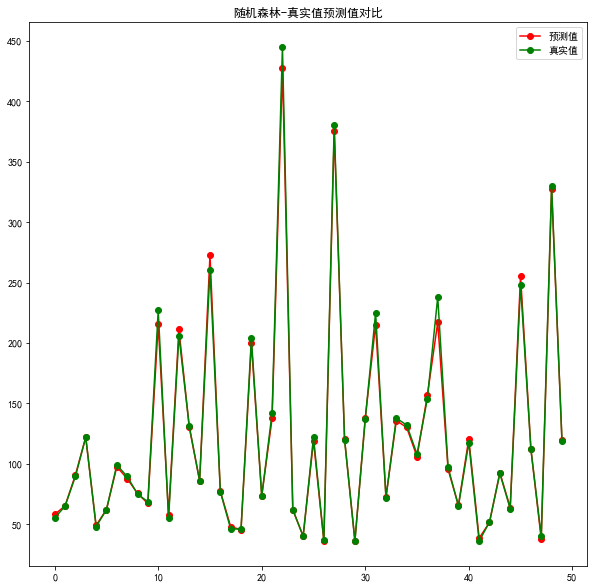

In [57]:
plt.figure(figsize=(10,10))
plt.title('随机森林-真实值预测值对比')
plt.plot(predict_y[:50], 'ro-', label='预测值')
plt.plot(test_y[:50], 'go-', label='真实值')
plt.legend()
plt.show()

In [61]:
def evaluation2(model):
    ypred = model.predict(x_test)
    mae = mean_absolute_error(y_test, ypred)
    mse = mean_squared_error(y_test, ypred)
    rmse = math.sqrt(mse)
#     print("MAE: %.2f" % mae)
#     print("MSE: %.2f" % mse)
#     print("RMSE: %.2f" % rmse)
    return ypred, mae, mse, rmse

In [62]:
maeList = []
mseList = []
rmseList = []
trainr2List = []
testr2List = []

for model in [model_LR, model_knn , model_dtr, model_rfr]:
    ypred, mae, mse, rmse = evaluation2(model)
    trainr2 = model.score(x_train, y_train)
    testr2 = model.score(x_test, y_test)
    maeList.append(mae)
    mseList.append(mse)
    rmseList.append(rmse)
    trainr2List.append(trainr2)
    testr2List.append(testr2)

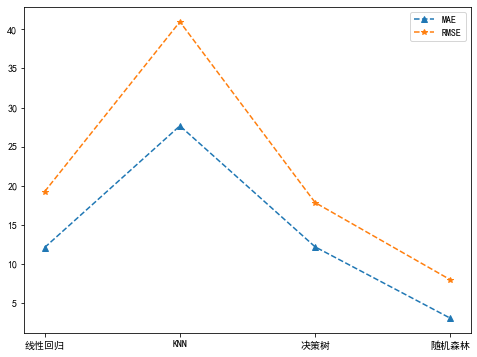

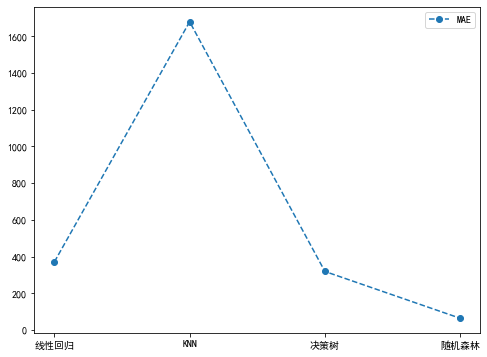

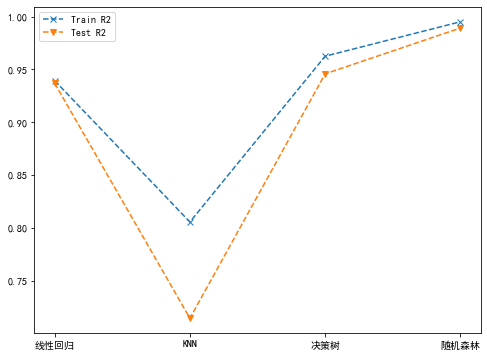

In [82]:
plt.figure(figsize=(8,6))
# plt.subplot(1,3,1)
plt.plot(['线性回归', 'KNN', '决策树', '随机森林'], maeList, '--^', label="MAE")
plt.plot(['线性回归', 'KNN', '决策树', '随机森林'], rmseList, '--*', label="RMSE")
plt.legend()
plt.show()
plt.figure(figsize=(8,6))
# plt.subplot(1,3,2)
plt.plot(['线性回归', 'KNN', '决策树', '随机森林'], mseList, '--o', label="MAE")
plt.legend()
plt.show()
plt.figure(figsize=(8,6))
# plt.subplot(1,3,3)
plt.plot(['线性回归', 'KNN', '决策树', '随机森林'], trainr2List, '--x', label="Train R2")
plt.plot(['线性回归', 'KNN', '决策树', '随机森林'], testr2List, '--v', label="Test R2")
plt.legend()
plt.show()

In [41]:
ypred = model_tf.predict(test_x)
mae = mean_absolute_error(test_y, ypred)
mse = mean_squared_error(test_y, ypred)
rmse = math.sqrt(mse)

train_ypred = model_tf.predict(train_x)
train_r2_score = r2_score(train_y, train_ypred)
test_r2_score = r2_score(test_y, ypred)
print("MAE: %.2f" % mae)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % rmse)
print("train score: ", train_r2_score)
print("test score: ", test_r2_score)

MAE: 7.32
MSE: 186.40
RMSE: 13.65
train score:  0.9946478743235019
test score:  0.9682902788957884


In [83]:
data

,总价,单位价格,楼房信息,建筑面积,套内面积,产权所属,房屋户型_室,房屋户型_厅,房屋户型_厨,房屋户型_卫,梯户比例_梯,梯户比例_户,梯户比例_比例,小区建造年份,楼栋总数,小区均价,抵押信息_01,挂牌时间差（天）,上次交易差（天）,房龄,所属区县_于洪,所属区县_和平,所属区县_大东,所属区县_沈北新区,所属区县_沈河,所属区县_浑南,所属区县_皇姑,所属区县_苏家屯,所属区县_铁西,所在楼层_中楼层,所在楼层_低楼层,所在楼层_高楼层,户型结构_复式,户型结构_平层,户型结构_暂无数据,户型结构_跃层,户型结构_错层,建筑类型_塔楼,建筑类型_平房,建筑类型_暂无数据,建筑类型_板塔结合,建筑类型_板楼,房屋朝向_东,房屋朝向_东 北,房屋朝向_东 南 北,房屋朝向_东 西,房屋朝向_东北,房屋朝向_东南,房屋朝向_其他朝向,房屋朝向_北,房屋朝向_北 南,房屋朝向_南,房屋朝向_南 北,房屋朝向_南 北 东,房屋朝向_南 北 西,房屋朝向_南 西 北,房屋朝向_西,房屋朝向_西北,房屋朝向_西南,建筑结构_未知结构,建筑结构_框架结构,建筑结构_混合结构,建筑结构_砖混结构,建筑结构_钢混结构,装修情况_其他,装修情况_毛坯,装修情况_简装,装修情况_精装,供暖方式_暂无数据,供暖方式_自供暖,供暖方式_集中供暖,配备电梯_无,配备电梯_暂无数据,配备电梯_有,交易权属_商品房,交易权属_已购公房,交易权属_经济适用房,交易权属_限价商品房,房屋用途_别墅,房屋用途_商住两用,房屋用途_普通住宅,房屋年限_暂无数据,房屋年限_未满两年,房屋年限_满两年,房屋年限_满五年
0,179.0,14512,2014,123.35,108.03,1,3,2,1,2,2,2,1.0,2013,27,17465,1,7,1056.000000,8,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0
1,105.0,9740,2011,107.81,92.49,0,3,2,1,1,2,4,2.0,1999,5,9590,0,2,2384.000000,11,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1
2,67.8,8693,2000,78.00,62.68,0,2,1,1,1,1,2,2.0,1990,13,14413,0,5,1361.000000,22,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,1,0
3,179.0,13426,2010,133.33,118.01,0,3,2,1,2,2,3,1.5,2009,27,11637,0,134,2076.000000,12,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1
4,90.0,7987,2009,112.69,97.37,1,3,2,1,2,1,2,2.0,2009,38,9263,0,9,2179.000000,13,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2979,96.0,9824,2012,97.72,82.40,0,2,1,1,1,2,4,2.0,2010,12,10455,0,600,1762.000000,10,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0
2980,47.0,6720,2016,69.95,54.63,0,2,1,1,1,2,3,1.5,2000,22,7545,0,105,415.000000,6,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,1,0,0
2981,82.0,9235,2016,88.79,67.55,0,3,2,1,2,2,3,1.5,2010,7,9553,1,75,73.000000,6,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,1,0,1,0,0
2982,19.0,5000,2018,38.00,22.68,1,1,1,1,1,4,18,4.5,2012,51,8849,0,669,1855.469715,4,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,0
